# <center>K-Means Clustering Algorithm with PCA</center> 

<center>By Arian Madadi<center>

# PCA 

For this data, we have 4 features: "Feature 1", "Feature 2", "Feature 3", and "Feature 4". These 4 features means that there are 4 dimensions within the information. This, of course, is suboptimal, as 4 dimensions are impossible to graph. For this reason, I will be applying Principal Component Analysis (PCA for short). PCA is an unsupervized dimensionality reducing algorithm. This means that its purpose is to turn those 4 dimensions into 3, 2, or even 1 dimension. The trade-off, however, is that each time a dimension is reduced, some information is lost, in one way or another.

# Import all the important packages


In [203]:
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing

# Importing dataset

In [1]:
dataset = pd.read_csv('/Users/arianmadadi/Desktop/ml/ml_data_train.csv')

NameError: name 'pd' is not defined

Have to import the intial data in order for to be able to use it lol.

# Standardizing the data

In [209]:
features = ['feature_1', 'feature_2', 'feature_3', 'feature_4']
x = dataset.loc[:, features].values
x = preprocessing.scale(x)

This standardization of data is always the key first step in PCA. PCA must be used on standardized data! If it isn't, it will produce improper results, because of varying levels of scale. We do this through "preprocessing.scale", from sklearn.

# Reducing the dimensions

In [210]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principaldataset = pd.DataFrame(data = principalComponents, \
columns = ['1st principal component', '2nd principal component'])

This is the rest of the process of PCA all in one. A comupter calculates the covariance matrices, the eigenvectors and eigenvalues, makes a feature vector, and then recasts the data - all with a couple lines of code.

# Check how much information is lost

In [211]:
pca.explained_variance_ratio_

array([0.5799806, 0.3339111])

Using pca.explained_variance_ratio_, we're able to find out how much variance (aka information) we lose through appliyng PCA. We can see that the first principal component contains 57.99806% of the variance, and the second principal component contains 33.39111%. This means we keep a total of 91.38917% of the data. The variance lost through PCA is 8.61083%. This isn't too bad, so appling PCA is a very valid strategy.

# Making an elbow plot to see which K will fit in best

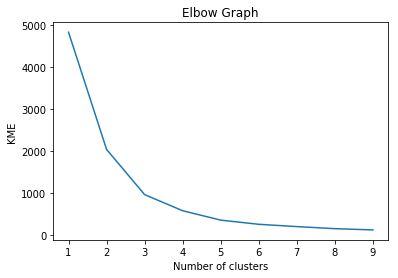

In [212]:
X = principaldataset.iloc[:,[0,1]].values
kme = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=0)
    kmeans.fit(X)
    kme.append(kmeans.inertia_)
plot.plot(range(1,10),kme)
plot.title('Elbow Graph')
plot.xlabel('Number of clusters')
plot.ylabel('KME')
plot.show()

The elbow graph is the most efficient way to see which value of K, meaing the number of clusters in the data, that we should have. It looks at the k-means inertia (the sum of squares within the cluster), labelled KME, and the varyingg number of clusters. We then simply pick the 'elbow' point on the graph. From this one in particular, we can see that the optimal number of clusters is going to be 3!

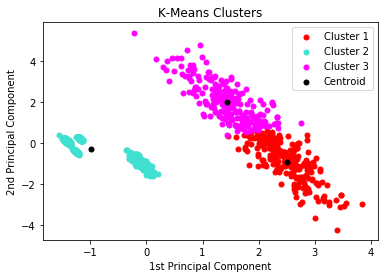

In [213]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
y=kmeans.fit_predict(X)
plot.scatter(X[y == 0,0], X[y == 0,1], s=25, c='red', label='Cluster 1')
plot.scatter(X[y == 1,0], X[y == 1,1], s=25, c='turquoise', label='Cluster 2')
plot.scatter(X[y == 2,0], X[y == 2,1], s=25, c='magenta', label='Cluster 3')

plot.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=25, c='black', label='Centroid')
             
plot.title('K-Means Clusters')
plot.xlabel('1st Principal Component')
plot.ylabel('2nd Principal Component')
plot.legend()
plot.show()

In [214]:
cl = ''.join(str(e) for e in y)
z = dataset[dataset.columns[0]].values
Cluster_labels = open('/Users/arianmadadi/Desktop/Clabels.txt','w+')
for i in range(len(z)):
    Cluster_labels.write(str(str(z[i])+','+str(cl[i])+'\n'))
Cluster_labels.close()

# Conclusion

In conclusion, I ended up scaling the data, as well as using PCA. The reason for which I did this is that I needed to use PCA to reduce the dimensions of the data, seeing as it was in 4 dimensions. In order to do this however, some standardization was needed. This standardization was in the form of scaling the data. As a result of needing to use PCA, I ended up scaling the data through preprocessing.scale, too. Thus, the order was to scale the data, and then to use PCA afterwards. PCA helped make the data easier to graph, as well as making it faster to compute, because the least important points are removed, so there are far fewer calculations to be made. 

The optimal parameters to be found for this was the dimensions that PCA should be reduced to, as well as the value of k. The value of k is explained earlier, with the k graph. The number of dimensions PCA should be reduced to, however, is explained by the fact that the data for a k-means must be visualized, and the best way to do this is with a 2D graph.

The final result of the data is seen above, where the clusters are color coded with turquoise, red, and magenta. As well as this, Clabels.txt contains every data observation, along with the cluster it belongs to.